In [ ]:
# importing necessary libraries
import pandas as pd

In [30]:
df = pd.read_excel("Tillit_Data_Science_Tech_Test.xlsx", sheet_name="data")
df.head()

,borrower_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,outcome,purpose,addr_state,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,537185,16075.0,60 months,NaN,NaN,MORTGAGE,50289.0,Fully Paid,home_improvement,SC,...,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0
1,1810804,8000.0,36 months,Graydon Head & Ritchey LLP,10+ years,MORTGAGE,64000.0,Fully Paid,debt_consolidation,IN,...,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0
2,388855,23700.0,36 months,Director of IT,3 years,RENT,88000.0,Fully Paid,debt_consolidation,FL,...,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0
3,1137067,1200.0,36 months,NaN,NaN,MORTGAGE,81000.0,Fully Paid,other,NY,...,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0
4,14585,3500.0,36 months,NaN,NaN,RENT,11736.0,Fully Paid,debt_consolidation,WA,...,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borrower_id                     41029 non-null  int64         
 1   loan_amnt                       41006 non-null  float64       
 2   term                            41029 non-null  object        
 3   emp_title                       36311 non-null  object        
 4   emp_length                      36628 non-null  object        
 5   home_ownership                  41029 non-null  object        
 6   annual_inc                      41029 non-null  float64       
 7   outcome                         41029 non-null  object        
 8   purpose                         41029 non-null  object        
 9   addr_state                      41029 non-null  object        
 10  dti                             41029 non-null  float64       
 11  de

In [32]:
for col in df.columns:
    print(col,":",df[col].isnull().sum())

borrower_id : 0
loan_amnt : 23
term : 0
emp_title : 4718
emp_length : 4401
home_ownership : 0
annual_inc : 0
outcome : 0
purpose : 0
addr_state : 0
dti : 0
delinq_2yrs : 0
earliest_cr_line : 0
inq_last_6mths : 0
mths_since_last_delinq : 21154
mths_since_last_record : 34213
open_acc : 0
pub_rec : 0
revol_bal : 0
revol_util : 24
total_acc : 0
collections_12_mths_ex_med : 0
mths_since_last_major_derog : 30378
acc_now_delinq : 0
tot_coll_amt : 2404
tot_cur_bal : 2404
open_acc_6m : 27678
open_act_il : 27678
open_il_12m : 27678
open_il_24m : 27678
mths_since_rcnt_il : 28014
total_bal_il : 27678
il_util : 29355
open_rv_12m : 27678
open_rv_24m : 27678
max_bal_bc : 27678
all_util : 27680
total_rev_hi_lim : 2404
inq_fi : 27678
total_cu_tl : 27678
inq_last_12m : 27678
acc_open_past_24mths : 1649
avg_cur_bal : 2404
bc_open_to_buy : 2099
bc_util : 2127
chargeoff_within_12_mths : 0
delinq_amnt : 0
mo_sin_old_il_acct : 3695
mo_sin_old_rev_tl_op : 2404
mo_sin_rcnt_rev_tl_op : 2404
mo_sin_rcnt_tl : 240

In [33]:
categorical_vars = ['term', 'emp_title', 'emp_length', 'home_ownership', 'outcome', 'purpose', 'addr_state']

for var in categorical_vars:
    print(f'Value counts for {var}:')
    print(df[var].value_counts())
    print('\n')


Value counts for term:
36 months    30250
60 months    10779
Name: term, dtype: int64


Value counts for emp_title:
Manager                     552
Teacher                     538
Supervisor                  264
Registered Nurse            236
RN                          230
                           ... 
Special Programs Auditor      1
LEAD CLERK                    1
Packaging                     1
City of Paris                 1
Signature Healthcare          1
Name: emp_title, Length: 20348, dtype: int64


Value counts for emp_length:
10+ years    13932
2 years       3252
3 years       2932
< 1 year      2755
5 years       2393
4 years       2287
1 year        2164
6 years       1840
8 years       1819
7 years       1770
9 years       1484
Name: emp_length, dtype: int64


Value counts for home_ownership:
MORTGAGE    21694
RENT        15058
OWN          4267
OTHER           5
ANY             3
NONE            2
Name: home_ownership, dtype: int64


Value counts for outcome:
Fully Paid

### Dropping columns with more than 50% missing values

In [34]:
threshold = 0.5
cols_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=cols_to_drop, inplace=True)


### Percentage of missing values in the remainging columns

In [35]:
for col in df.columns:
    print(col,":",df[col].isnull().sum()/41029*100)

borrower_id : 0.0
loan_amnt : 0.05605791025859758
term : 0.0
emp_title : 11.499183504350581
emp_length : 10.726559262960345
home_ownership : 0.0
annual_inc : 0.0
outcome : 0.0
purpose : 0.0
addr_state : 0.0
dti : 0.0
delinq_2yrs : 0.0
earliest_cr_line : 0.0
inq_last_6mths : 0.0
open_acc : 0.0
pub_rec : 0.0
revol_bal : 0.0
revol_util : 0.05849521070462356
total_acc : 0.0
collections_12_mths_ex_med : 0.0
acc_now_delinq : 0.0
tot_coll_amt : 5.85927027224646
tot_cur_bal : 5.85927027224646
total_rev_hi_lim : 5.85927027224646
acc_open_past_24mths : 4.019108435496844
avg_cur_bal : 5.85927027224646
bc_open_to_buy : 5.115893636208535
bc_util : 5.184138048697263
chargeoff_within_12_mths : 0.0
delinq_amnt : 0.0
mo_sin_old_il_acct : 9.005825148066002
mo_sin_old_rev_tl_op : 5.85927027224646
mo_sin_rcnt_rev_tl_op : 5.85927027224646
mo_sin_rcnt_tl : 5.85927027224646
mort_acc : 4.019108435496844
mths_since_recent_bc : 5.042774622827756
mths_since_recent_inq : 13.02249628311682
num_accts_ever_120_pd : 

### By analysing the percentage of missing values in the remaining columns, the highest missing value percentage is 13%. So we can impute these missing values using SimpleImputer

### Imputing missing values for numerical columns

In [36]:
from sklearn.impute import SimpleImputer
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   borrower_id                 41029 non-null  float64       
 1   loan_amnt                   41029 non-null  float64       
 2   term                        41029 non-null  object        
 3   emp_title                   36311 non-null  object        
 4   emp_length                  36628 non-null  object        
 5   home_ownership              41029 non-null  object        
 6   annual_inc                  41029 non-null  float64       
 7   outcome                     41029 non-null  object        
 8   purpose                     41029 non-null  object        
 9   addr_state                  41029 non-null  object        
 10  dti                         41029 non-null  float64       
 11  delinq_2yrs                 41029 non-null  float64   

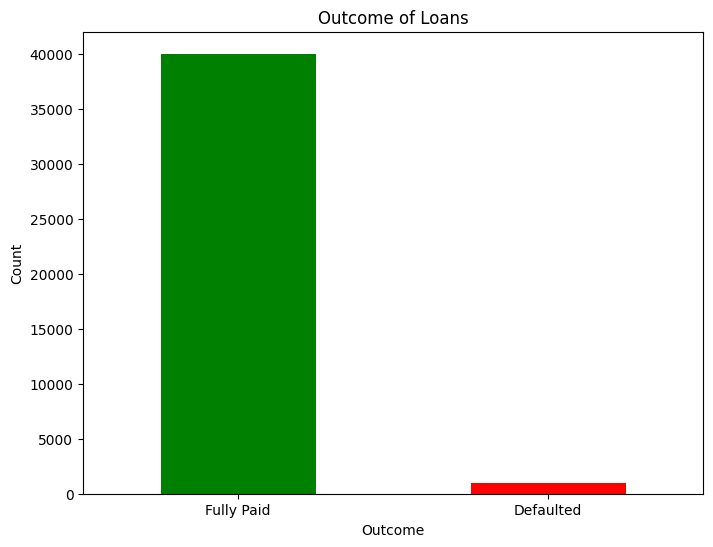

In [38]:
import matplotlib.pyplot as plt

outcome_counts = df['outcome'].value_counts()

plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Outcome of Loans')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### We can say that the data is imbalanced
### First building a model to find out the accuracy and then if the accuracy is less then we can balance the data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [40]:
df.drop(columns=['borrower_id'], inplace=True)
X = df.drop(columns=['outcome'])
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Define numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [42]:
# Define the classifier
classifier = LogisticRegression()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)


In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9786741408725322

Classification Report:
               precision    recall  f1-score   support

   Defaulted       0.00      0.00      0.00       175
  Fully Paid       0.98      1.00      0.99      8031

    accuracy                           0.98      8206
   macro avg       0.49      0.50      0.49      8206
weighted avg       0.96      0.98      0.97      8206



### The accuracy of the model is 97.87% but it seems that the model is performing poorly in predicting minority class "Defaulted" as the precision, recall and f1-score of Defaulted class are all zero

### Using SMOTE to balance the data

In [44]:
df[categorical_vars] = df[categorical_vars].astype(str)
label_encoder = LabelEncoder()
df_encoded = df.copy()
for col in categorical_vars:
    df_encoded[col] = label_encoder.fit_transform(df[col])


In [45]:
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [46]:
X = df_encoded.drop('outcome', axis=1)
y = df_encoded['outcome']


In [47]:
X.dtypes

loan_amnt                            float64
term                                   int64
emp_title                              int64
emp_length                             int64
home_ownership                         int64
annual_inc                           float64
purpose                                int64
addr_state                             int64
dti                                  float64
delinq_2yrs                          float64
earliest_cr_line              datetime64[ns]
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal                            float64
revol_util                           float64
total_acc                            float64
collections_12_mths_ex_med           float64
acc_now_delinq                       float64
tot_coll_amt                         float64
tot_cur_bal                          float64
total_rev_hi_lim                     float64
acc_open_p

In [48]:
y.dtype

dtype('int64')

In [49]:
X = X.drop(columns=['earliest_cr_line'])


In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.5994254309268049
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      7995
           1       0.63      0.49      0.55      8017

    accuracy                           0.60     16012
   macro avg       0.60      0.60      0.59     16012
weighted avg       0.60      0.60      0.59     16012



### The accuracy was dropped but still got a good recall, precision and f1-score for two classes

## Trying out other methods

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7995
           1       0.98      1.00      0.99      8017

    accuracy                           0.99     16012
   macro avg       0.99      0.99      0.99     16012
weighted avg       0.99      0.99      0.99     16012



In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_y_pred = gb_classifier.predict(X_test)
print("Gradient Boosting Classifier:")
print(classification_report(y_test, gb_y_pred))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7995
           1       0.95      1.00      0.97      8017

    accuracy                           0.97     16012
   macro avg       0.97      0.97      0.97     16012
weighted avg       0.97      0.97      0.97     16012



## Random Forest Classifer is the best of both and it is classifying both models with highest accuracy

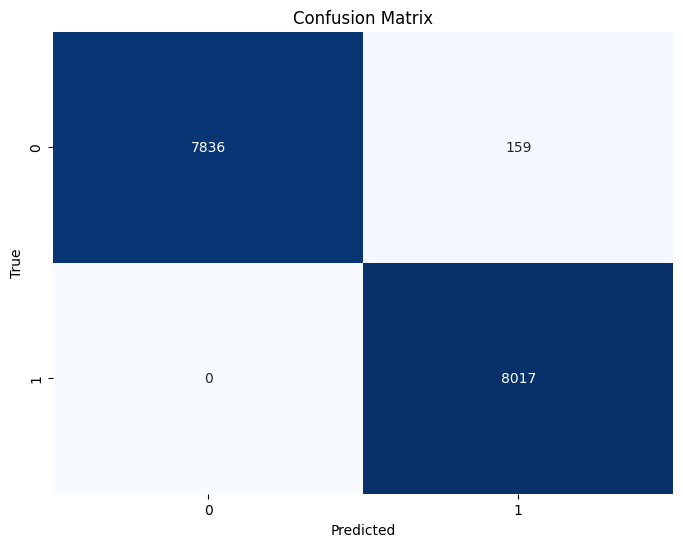

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
import joblib
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [77]:
X_test.columns

Index(['loan_amnt', 'term', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 

In [67]:
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

test_data_index = 10
test_data = X_test.iloc[test_data_index].values.reshape(1, -1)
print(test_data)

# Predict using the loaded model
prediction = loaded_model.predict(test_data)
print("Prediction:", prediction)
lab=['Defaulted','Fully Paid']
print("value: ",lab[prediction[0]])

[[6.04045967e+03 0.00000000e+00 1.59210000e+04 0.00000000e+00
  5.00000000e+00 3.00229833e+04 2.00000000e+00 4.00000000e+00
  3.50171316e+01 2.02298335e-01 0.00000000e+00 8.19080666e+00
  0.00000000e+00 5.69251892e+03 7.70469219e+01 1.11908067e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.74496350e+04
  7.48206850e+03 1.80919334e+00 2.30139198e+03 1.03253070e+03
  9.00494591e+01 0.00000000e+00 0.00000000e+00 5.23816133e+01
  6.86827849e+01 6.39310500e+00 6.39310500e+00 0.00000000e+00
  6.39310500e+00 9.22528168e+00 2.02298335e-01 3.79770167e+00
  4.59540333e+00 3.79770167e+00 5.59540333e+00 3.20229833e+00
  6.19080666e+00 7.98850833e+00 4.59540333e+00 8.19080666e+00
  0.00000000e+00 0.00000000e+00 2.02298335e-01 1.20229833e+00
  1.00000000e+02 7.97701665e+01 0.00000000e+00 0.00000000e+00
  3.82497861e+04 1.74496350e+04 5.80689500e+03 3.07677176e+04]]
Prediction: [0]
value:  Defaulted
